In [5]:
import numpy as np

In [6]:
## PARAMETERS

GAMMA = 0.999 # discount factor
DELTA = 1e-3  # bellman error
STEPCOST = -5 # timestep penalty

In [7]:
class Position:
    
    def __init__(self, name, acts, prob1, prob2, prob3=0):
        self.name = name
        self.move_prob = prob1 # up, down, left, right, stay
        self.spec_prob = prob2 # hit, craft, gather
        self.shoot_prob = prob3 # shoot
        self.actions = list(np.array(actions)[acts])
        
    def up(self):
        i = positions.index(self)
        return positions[i+1]
    
    def down(self):
        i = positions.index(self)
        return positions[i-1]
    
    def right(self):
        i = positions.index(self)
        return positions[i+2]
    
    def left(self):
        i = positions.index(self)
        return positions[i-2]
        #TASK 2.1:
        #return positions[0]
    
    def default(self):
        return positions[-1]
    

In [8]:
actions = ['UP', 'LEFT', 'DOWN', 'RIGHT', 'STAY', 'SHOOT', 'HIT', 'CRAFT', 'GATHER', 'NONE']

In [9]:
center = Position('C', [0, 1, 2, 3, 4, 5, 6], 0.85, 0.1, 0.5)
north = Position('N', [2, 4, 7], 0.85, [0.5, 0.35, 0.15])
south = Position('S', [0, 4, 8], 0.85, 0.75)
east = Position('E', [1, 4, 5, 6], 1, 0.2, 0.9)
west = Position('W', [3, 4, 5], 1, 0, 0.25)

In [6]:
positions = [west, south, center, north, east]
mm_state = ['D', 'R']

In [7]:
states = {}

for pos in positions:
    for mat in range(0,3):
        for arrow in range(0, 4):
            for mm in range(0, 2):
                for health in range(0, 5):
                    states.update({(pos, mat, arrow, mm, health*25): [[actions[-1], 0]]})

# print('({}, {}, {}, {}, {})'.format(pos.name, str(mat), str(arrow), mm_state[mm], str(health)), states[state][0])

In [8]:
def get_util(state, itr, **kwargs):
    p, m, a, s, h = state
    p = kwargs.get('pos', p)
    m = kwargs.get('mat', m)
    a = kwargs.get('arrow', a)
    s = kwargs.get('mm', s)
    h = kwargs.get('health', h)
    newstate = (p, m, a, s, h)
    return states[newstate][itr][1]

In [9]:
itr = 0
diff = 50
diffs = []

while(diff > DELTA):
    for state in states:
        pos, mat, arrow, mm, health = state
        u_t1 = {}
        p1 = pos.move_prob
        p2 = pos.spec_prob

        if health:
            if mm:  # READY
                regain = health+25 if health < 100 else 100
                u_failure = get_util(state, itr, arrow=0, mm=0, health=regain)
                penalty = -40 if pos == east or pos == center else 0
                # action: UP
                if 'UP' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.up())
                    u_default = get_util(state, itr, pos=pos.default())
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_success_d = get_util(state, itr, pos=pos.up(), mm=0)
                        u_default_d = get_util(
                            state, itr, pos=pos.default(), mm=0)
                        u_dormant = p1 * \
                            (STEPCOST + GAMMA*u_success_d) + \
                            (1-p1)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'UP'})

                # action: LEFT
                if 'LEFT' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.left())
                    u_default = get_util(state, itr, pos=pos.default())
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_success_d = get_util(
                            state, itr, pos=pos.left(), mm=0)
                        u_default_d = get_util(
                            state, itr, pos=pos.default(), mm=0)
                        u_dormant = p1 * \
                            (STEPCOST + GAMMA*u_success_d) + \
                            (1-p1)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'LEFT'})

                # action: DOWN
                if 'DOWN' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.down())
                    u_default = get_util(state, itr, pos=pos.default())
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_success_d = get_util(
                            state, itr, pos=pos.down(), mm=0)
                        u_default_d = get_util(
                            state, itr, pos=pos.default(), mm=0)
                        u_dormant = p1 * \
                            (STEPCOST + GAMMA*u_success_d) + \
                            (1-p1)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'DOWN'})

                # action: RIGHT
                if 'RIGHT' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.right())
                    u_default = get_util(state, itr, pos=pos.default())
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_success_d = get_util(
                            state, itr, pos=pos.right(), mm=0)
                        u_default_d = get_util(
                            state, itr, pos=pos.default(), mm=0)
                        u_dormant = p1 * \
                            (STEPCOST + GAMMA*u_success_d) + \
                            (1-p1)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'RIGHT'})

                # action: STAY
                if 'STAY' in pos.actions:
                    u_success = get_util(state, itr)
                    u_default = get_util(state, itr, pos=pos.default())
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_success_d = get_util(state, itr, mm=0)
                        u_default_d = get_util(
                            state, itr, pos=pos.default(), mm=0)
                        u_dormant = p1 * \
                            (STEPCOST + GAMMA*u_success_d) + \
                            (1-p1)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'STAY'})

                # action: SHOOT
                if ('SHOOT' in pos.actions) and arrow:
                    reward = 50 if health == 25 else 0
                    p3 = pos.shoot_prob
                    u_success = get_util(
                        state, itr, arrow=arrow-1, health=health-25)
                    u_default = get_util(state, itr, arrow=arrow-1)
                    u_independant = p3 * \
                        (STEPCOST + reward + GAMMA*u_success) + \
                        (1-p3)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_success_d = get_util(
                            state, itr, arrow=arrow-1, health=health-25, mm=0)
                        u_default_d = get_util(state, itr, arrow=arrow-1, mm=0)
                        u_dormant = p3 * \
                            (STEPCOST + reward + GAMMA*u_success_d) + \
                            (1-p3)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'SHOOT'})

                # action: HIT
                if 'HIT' in pos.actions:
                    if health > 50:
                        reward = 0
                        u_success = get_util(state, itr, health=health-50)
                        u_success_d = get_util(
                            state, itr, health=health-50, mm=0)
                    else:
                        reward = 50
                        u_success = get_util(state, itr, health=0)
                        u_success_d = get_util(state, itr, health=0, mm=0)
                    u_default = get_util(state, itr)
                    u_independant = p2 * \
                        (STEPCOST + reward + GAMMA*u_success) + \
                        (1-p2)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_default_d = get_util(state, itr, mm=0)
                        u_dormant = p2 * \
                            (STEPCOST + reward + GAMMA*u_success_d) + \
                            (1-p2)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'HIT'})

                # action: CRAFT
                if ('CRAFT' in pos.actions) and mat:
                    u_3 = get_util(state, itr, arrow=3, mat=mat-1)
                    u_2 = get_util(state, itr, arrow=2, mat=mat -
                                   1) if not arrow else get_util(state, itr, arrow=3, mat=mat-1)
                    u_1 = get_util(state, itr, arrow=arrow+1, mat=mat -
                                   1) if arrow < 3 else get_util(state, itr, arrow=3, mat=mat-1)
                    u_independant = p2[0]*(STEPCOST + GAMMA*u_1) + p2[1] * \
                        (STEPCOST + GAMMA*u_2) + p2[2]*(STEPCOST + GAMMA*u_3)
                    if penalty == 0:
                        u_3d = get_util(state, itr, arrow=3, mat=mat-1, mm=0)
                        u_2d = get_util(state, itr, arrow=2, mat=mat - 1, mm=0) if not arrow else get_util(
                            state, itr, arrow=3, mat=mat-1, mm=0)
                        u_1d = get_util(state, itr, arrow=arrow+1, mat=mat - 1,
                                        mm=0) if arrow < 3 else get_util(state, itr, arrow=3, mat=mat-1, mm=0)
                        u_dormant = p2[0]*(STEPCOST + GAMMA*u_1d) + p2[1] * \
                            (STEPCOST + GAMMA*u_2d) + \
                            p2[2]*(STEPCOST + GAMMA*u_3d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'CRAFT'})

                # action: GATHER
                if 'GATHER' in pos.actions:
                    u_default = get_util(state, itr)
                    u_success = get_util(
                        state, itr, mat=mat+1) if mat < 2 else u_default
                    u_independant = p2 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p2)*(STEPCOST + GAMMA*u_default)
                    if penalty == 0:
                        u_default_d = get_util(state, itr, mm=0)
                        u_success_d = get_util(
                            state, itr, mat=mat+1, mm=0) if mat < 2 else u_default_d
                        u_dormant = p2 * \
                            (STEPCOST + GAMMA*u_success_d) + \
                            (1-p2)*(STEPCOST + GAMMA*u_default_d)
                        util = 0.5*(u_independant) + 0.5*(u_dormant)
                    else:
                        util = 0.5*(u_independant) + 0.5 * \
                            (STEPCOST + penalty + GAMMA*u_failure)
                    u_t1.update({util: 'GATHER'})

            else:  # DORMANT
                # action: UP
                if 'UP' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.up())
                    u_success_r = get_util(state, itr, pos=pos.up(), mm=1)
                    u_default = get_util(state, itr, pos=pos.default())
                    u_default_r = get_util(state, itr, pos=pos.default(), mm=1)
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    u_ready = p1*(STEPCOST + GAMMA*u_success_r) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'UP'})

                # action: LEFT
                if 'LEFT' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.left())
                    u_success_r = get_util(state, itr, pos=pos.left(), mm=1)
                    u_default = get_util(state, itr, pos=pos.default())
                    u_default_r = get_util(state, itr, pos=pos.default(), mm=1)
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    u_ready = p1*(STEPCOST + GAMMA*u_success_r) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'LEFT'})

                # action: DOWN
                if 'DOWN' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.down())
                    u_success_r = get_util(state, itr, pos=pos.down(), mm=1)
                    u_default = get_util(state, itr, pos=pos.default())
                    u_default_r = get_util(state, itr, pos=pos.default(), mm=1)
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    u_ready = p1*(STEPCOST + GAMMA*u_success_r) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'DOWN'})

                # action: RIGHT
                if 'RIGHT' in pos.actions:
                    u_success = get_util(state, itr, pos=pos.right())
                    u_success_r = get_util(state, itr, pos=pos.right(), mm=1)
                    u_default = get_util(state, itr, pos=pos.default())
                    u_default_r = get_util(state, itr, pos=pos.default(), mm=1)
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    u_ready = p1*(STEPCOST + GAMMA*u_success_r) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'RIGHT'})

                # action: STAY
                if 'STAY' in pos.actions:
                    u_success = get_util(state, itr)
                    u_success_r = get_util(state, itr, mm=1)
                    u_default = get_util(state, itr, pos=pos.default())
                    u_default_r = get_util(state, itr, pos=pos.default(), mm=1)
                    u_independant = p1 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default)
                    u_ready = p1*(STEPCOST + GAMMA*u_success_r) + \
                        (1-p1)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'STAY'})

                # action: SHOOT
                if ('SHOOT' in pos.actions) and arrow:
                    reward = 50 if health == 25 else 0
                    p3 = pos.shoot_prob
                    u_success = get_util(
                        state, itr, arrow=arrow-1, health=health-25)
                    u_success_r = get_util(
                        state, itr, arrow=arrow-1, health=health-25, mm=1)
                    u_default = get_util(state, itr, arrow=arrow-1)
                    u_default_r = get_util(state, itr, arrow=arrow-1, mm=1)
                    u_independant = p3 * \
                        (STEPCOST + reward + GAMMA*u_success) + \
                        (1-p3)*(STEPCOST + GAMMA*u_default)
                    u_ready = p3*(STEPCOST + reward + GAMMA*u_success_r) + \
                        (1-p3)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'SHOOT'})

                # action: HIT
                if 'HIT' in pos.actions:
                    if health > 50:
                        reward = 0
                        u_success = get_util(state, itr, health=health-50)
                        u_success_r = get_util(
                            state, itr, health=health-50, mm=1)
                    else:
                        reward = 50
                        u_success = get_util(state, itr, health=0)
                        u_success_r = get_util(state, itr, health=0, mm=1)
                    u_default = get_util(state, itr)
                    u_default_r = get_util(state, itr, mm=1)
                    u_independant = p2 * \
                        (STEPCOST + reward + GAMMA*u_success) + \
                        (1-p2)*(STEPCOST + GAMMA*u_default)
                    u_ready = p2*(STEPCOST + reward + GAMMA*u_success_r) + \
                        (1-p2)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'HIT'})

                # action: CRAFT
                if ('CRAFT' in pos.actions) and mat:
                    u_3 = get_util(state, itr, arrow=3, mat=mat-1)
                    u_3r = get_util(state, itr, arrow=3, mat=mat-1, mm=1)
                    u_2 = get_util(state, itr, arrow=2, mat=mat -
                                   1) if not arrow else get_util(state, itr, arrow=3, mat=mat-1)
                    u_2r = get_util(state, itr, arrow=2, mat=mat-1, mm=1) if not arrow else get_util(
                        state, itr, arrow=3, mat=mat-1, mm=1)
                    u_1 = get_util(state, itr, arrow=arrow+1, mat=mat -
                                   1) if arrow < 3 else get_util(state, itr, arrow=3, mat=mat-1)
                    u_1r = get_util(state, itr, arrow=arrow+1, mat=mat-1,
                                    mm=1) if arrow < 3 else get_util(state, itr, arrow=3, mat=mat-1, mm=1)
                    u_independant = p2[0]*(STEPCOST + GAMMA*u_1) + p2[1] * \
                        (STEPCOST + GAMMA*u_2) + p2[2]*(STEPCOST + GAMMA*u_3)
                    u_ready = p2[0]*(STEPCOST + GAMMA*u_1r) + p2[1] * \
                        (STEPCOST + GAMMA*u_2r) + p2[2]*(STEPCOST + GAMMA*u_3r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'CRAFT'})

                # action: GATHER
                if 'GATHER' in pos.actions:
                    u_default = get_util(state, itr)
                    u_default_r = get_util(state, itr, mm=1)
                    u_success = get_util(
                        state, itr, mat=mat+1) if mat < 2 else u_default
                    u_success_r = get_util(
                        state, itr, mat=mat+1, mm=1) if mat < 2 else u_default_r
                    u_independant = p2 * \
                        (STEPCOST + GAMMA*u_success) + \
                        (1-p2)*(STEPCOST + GAMMA*u_default)
                    u_ready = p2*(STEPCOST + GAMMA*u_success_r) + \
                        (1-p2)*(STEPCOST + GAMMA*u_default_r)
                    util = 0.2*(u_ready) + 0.8*(u_independant)
                    u_t1.update({util: 'GATHER'})

        if len(u_t1):
            utility = np.max(list(u_t1.keys()))
            action = u_t1[utility]
        else:
            utility = get_util(state, itr)
            action = actions[-1]
        states[state].append([action, utility])

    # print(diff)
    arr = np.array(list(states.values()))
    diff = np.max(abs(arr[:, itr+1, 1].astype(float) -
                      arr[:, itr, 1].astype(float)))
    print(diff)
    diffs.append(diff)
    itr += 1
    
print(itr, " iterations")

40.0
18.32165
12.957869160000001
7.100156857378494
6.481961975270487
6.297005586704593
6.118172040827773
5.846144791233058
5.351019096340053
5.061412938328459
4.95022440104875
4.9452741766477
4.940328902471052
4.935388573568574
4.930453184995002
4.925522731810005
4.9205972090781955
4.915676611869131
4.910760935257272
4.905850174321998
4.900944324147673
4.531836342313468
3.513866733397876
2.8949167173720554
2.4852846486761564
2.166130136467004
1.9057459997545578
1.6943836383167792
1.5191561785059235
1.3693816172504114
1.240356617510912
1.1277756900672955
1.028249425886969
0.9393572964675059
0.8593413795440483
0.7869008920722251
0.7210524632539261
0.6610290406962918
0.6062113217957403
0.5560828789978132
0.5102012059081176
0.46817920626563136
0.4296733151076637
0.39437568976228476
0.3620088330665112
0.3323216511013811
0.30508636665283007
0.2800959690714251
0.25716203168553875
0.23611280867754658
0.2167915627899788
0.19905509240683728
0.18277243316671843
0.1678237118125594
0.15409913160152

In [10]:
num_iter = len(states[(center, 2, 3, 0, 25)])

for i in range(1, num_iter):
    print('iteration=', i)
    for state in states:
        pos, mat, arrow, mm, health = state
        action, utility = states[state][i]
        print('({},{},{},{},{}):{}=[{}]'.format(pos.name, str(mat), str(arrow), mm_state[mm], str(health), action, format(utility, '.3f')))


In [11]:
east.spec_prob

0.2

In [12]:
# test
states[(center, 2, 1, 1, 50)]

[['NONE', 0],
 ['HIT', -22.5],
 ['DOWN', -31.118875],
 ['DOWN', -36.819955712500004],
 ['DOWN', -42.039079474202694],
 ['UP', -45.906083201644876],
 ['UP', -48.161976889652756],
 ['UP', -50.80482227855713],
 ['UP', -53.67362551848095],
 ['UP', -55.76804657265728],
 ['UP', -58.02885467574619],
 ['UP', -60.30278904395939],
 ['UP', -62.515648584344596],
 ['UP', -64.57270932547043],
 ['UP', -66.50505314225713],
 ['UP', -68.32051093190084],
 ['UP', -70.02917041995431],
 ['UP', -71.63879895216584],
 ['UP', -73.15021154547043],
 ['UP', -74.57237916059414],
 ['UP', -75.90439865686898],
 ['UP', -77.15035026347067],
 ['UP', -78.3171984628622],
 ['UP', -79.40642147126354],
 ['UP', -80.39975294136904],
 ['UP', -81.30833556305686],
 ['UP', -82.14329190957918],
 ['UP', -82.90695490212207],
 ['UP', -83.60818115406744],
 ['UP', -84.25321723261747],
 ['UP', -84.84663893705088],
 ['UP', -85.39217488839392],
 ['UP', -85.89235447513339],
 ['UP', -86.34973358433118],
 ['UP', -86.76903762093717],
 ['UP', -8

In [13]:
import matplotlib.pyplot as plt

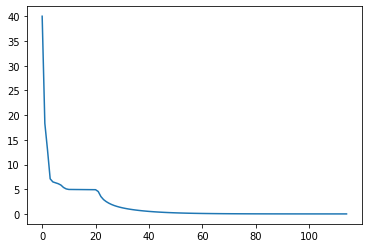

In [14]:
plt.plot(diffs)

In [10]:
north.actions

['DOWN', 'STAY', 'CRAFT']